# Ch02.04 히스토그램

---
* 날짜: 2022.04.18
* 이름: 윤태우


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')

```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [4, 3]
plt.style.use('seaborn-white')
sns.set_style('white')


## **개념정리**
---




### (1) Matplotlib 으로 그리기


#### **| 기본사용**

```
x = np.random.randn(5000) # 표준정규분포
plt.hist(x)
plt.show()
```

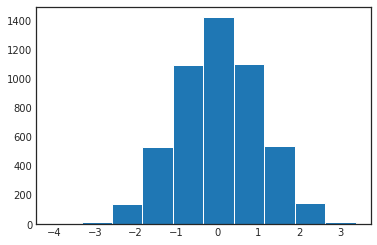

In [2]:
x = np.random.randn(5000) # 표준정규분포
plt.hist(x) # 1차원 배열
plt.show()

# x = [-2,-1,0,1,2]
# y = [200,800,1300,1400,800]

#### **| 옵션**

```
plt.hist(data, 
        bins = 구간개수,
        color=색,
        edgecolor=테두리 색, 
        alpha=투명도 (0~1),
        density=정규화 여부 (True/False),
        cumulative=누적여부 (True/Fasle),  
        histtype = 플롯 형식 {'bar', 'barstacked', 'step', 'stepfilled' } default: 'bar'
        label = 레이블,
        align=눈금 위치 {'left', 'mid', 'right'}, default: 'mid'
```

In [3]:
# plt.hist(data, 
#         bins = 2,
#         color= 'yellow',
#         edgecolor= 'black', 
#         alpha= alpha = 0.7,
#         density= True, # 비교하고싶은 두 데이터의 크기 차이가 클때 덴시티로 크기를 맞춰 비교하기 수월하게 해줌.(True시)
#         cumulative= True,  
#         histtype = 플롯 형식 {'bar', 'barstacked', 'step', 'stepfilled' } default: 'bar'
#         label = 레이블,
#         align=눈금 위치 {'left', 'mid', 'right'}, default: 'mid'

#### **| 여러개의 히스토그램**

```
plt.hist([x1,x2, ..])
```

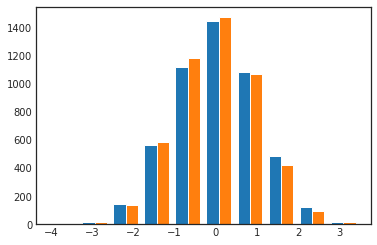

In [4]:
x2 = np.random.randn(5000)
plt.hist([x,x2])
plt.show()

### (2) Seaborn 으로 그리기



#### **| 기본사용**

```
sns.histplot(x)
```

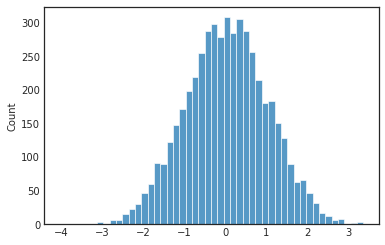

In [5]:
sns.histplot(x)

#### **| 옵션**

```
seaborn.histplot(data=None, 
                 bins='auto', # 구간개수
                 cumulative=False, # 누적여부
                 element='bars', # 플롯형식 {“bars”, “step”, “poly”},
                 multiple='layer' # 다중데이터 플롯형식{“layer”, “dodge”, “stack”, “fill”},
                 fill=True, # 색칠 여부
                 shrink=1, # 너비 감소
                 kde=False, # kde선
                 color=None, # 색깔
                 log_scale=None # 로그스케일)
```

#### **| 여러개의 히스토그램**

```
sns.histplot([x1, x2, ...])
```

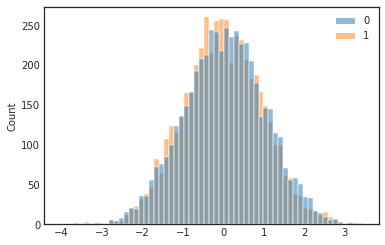

In [6]:
sns.histplot([x,x2])

#### **| DataFrame 사용**




* 데이터 프레임을 만들어 줍니다.



In [7]:
df = pd.DataFrame([x,x*2]).T
df.head()

,0,1
0,-1.534019,-3.068038
1,-2.237782,-4.475565
2,0.839899,1.679798
3,0.372291,0.744581
4,-0.678822,-1.357643


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot(kind='hist')
```




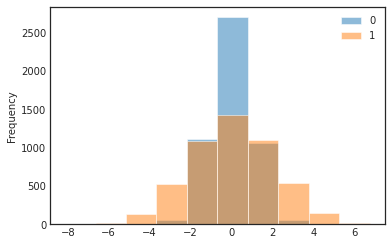

In [8]:
df.plot(kind='hist', alpha = 0.5)

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.histplot(data=df, x=x_column)
```


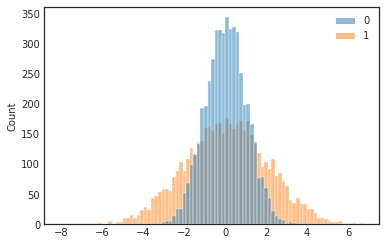

In [9]:
sns.histplot(data=df)


## **실습**
---


### (1) `plt.hist`의 `histtypes` 옵션비교

```
x1 = np.random.normal(0, 1, 5000)
x2 = np.random.normal(0, 3, 5000)
x3 = np.random.normal(10, 3, 5000)

histtypes=['bar', 'barstacked', 'step', 'stepfilled']

```

In [10]:
x1 = np.random.normal(0, 1, 5000)   # 평균 0, 편차1== 표준정규분표
x2 = np.random.normal(0, 3, 5000)   # 평균 0, 편차 3
x3 = np.random.normal(10, 3, 5000)  # 평균10,편차 3

histtypes=['bar', 'barstacked', 'step', 'stepfilled']

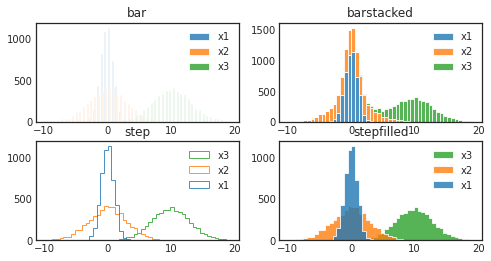

In [11]:
plt.figure(figsize = (8,4))
# 2X2 플롯에 그리기
for i,histtype in enumerate(histtypes) :
  plt.subplot(2,2,i+1)
  plt.hist([x1,x2,x3], histtype=histtype, label = ['x1', 'x2', 'x3'], alpha=0.8, bins = 50)
  plt.legend()
  plt.title(histtype)
plt.show()

### (2) 객체지향 사용하기


```
fig, ax = plt.subplots(2,2, figsize=size)
```

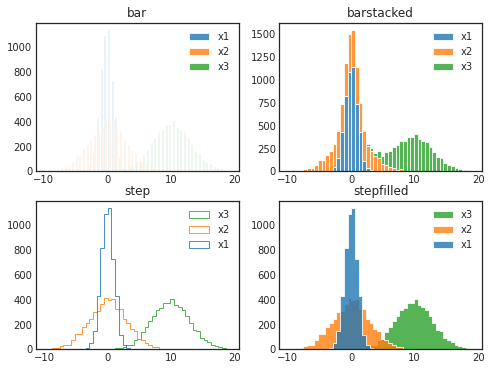

In [12]:
fig, ax = plt.subplots(2,2,figsize = (8,6))  # fig = 전체그림, ax = 서브플롯
ax = ax.flatten()

for i,histtype in enumerate(histtypes) :
  ax[i].hist([x1,x2,x3], histtype=histtype, label = ['x1', 'x2', 'x3'], alpha=0.8, bins = 50)
  ax[i].legend()
  ax[i].set_title(histtype)
plt.show()

### (3) Iris 데이터 변수별 분포 그리기

```
           꽃받침 길이   꽃받침 너비   꽃의 길이  꽃의 너비
 샘플1      
 샘플2 
 ...
 샘플150
```


```
from sklearn.datasets import load_iris
iris = load_iris()
```


* `.feature_names` : 변수 이름
* `.target_names` : 타겟 이름
* `.data` : 데이터 
* `.target` : 타겟


In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

In [14]:
# 변수 이름 / 라벨 이름
x_names = iris.feature_names
y_names = iris.target_names
print('x names: ', x_names)
print('y names: ', y_names)

x names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
y names:  ['setosa' 'versicolor' 'virginica']


In [15]:
# 데이터셋
x_data = iris.data
y_data = iris.target
print('x: ', x_data.shape)
print('y: ', y_data.shape)

x:  (150, 4)
y:  (150,)



## **과제**
---


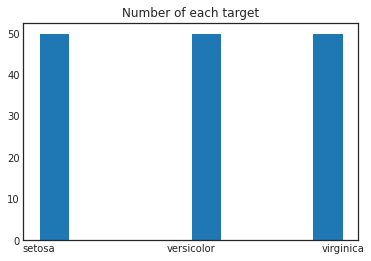

In [16]:
plt.hist(y_data)
plt.xticks([0,1,2],y_names)
plt.title('Number of each target')
plt.show()

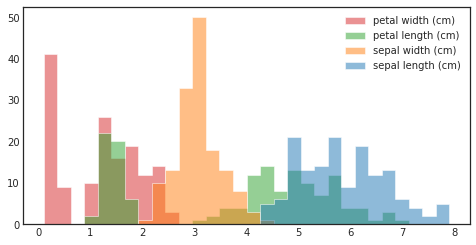

In [17]:
x_data.shape
plt.figure(figsize = (8,4))
plt.hist(x_data, histtype = 'stepfilled', bins = 30, alpha = 0.5, label = x_names) # 1차원 배열
plt.legend()
plt.show()

In [18]:
x_data[0]    # 0번째 샘플
x_data[:,0]  # 모든 샘플, 0번째 변수

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

#플러스 과제 :
**petal / sepal 각각 나눠서 그리기**


**2X1 size**

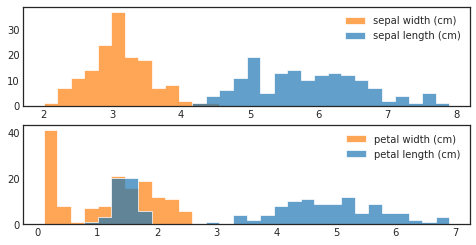

In [19]:
plt.figure(figsize = (8,4))

plt.subplot(2,1,1)
plt.hist(x_data[:,:2],label = x_names[:2], histtype = 'stepfilled', bins=30, alpha = 0.7)
plt.legend()
plt.subplot(2,1,2)
plt.hist(x_data[:,2:], label = x_names[2:], histtype = 'stepfilled', bins=30, alpha = 0.7)
plt.legend()
plt.show()

### (1)  지수분포(exponential distribution) 그리기




* 지수분포의 확률밀도 함수는 다음과 같습니다.


![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7ae26c8e2d08abfda4102c31e1f380e7fa9068b7)

* 아래와 같이 넘파이 함수를 이용해 확률밀도 함수를 따르는 데이터셋을 얻을 수 있습니다.

```
np.random.exponential(scale=lambda, size=데이터개수)
```

* lambda 값이 각각 `0.5, 1, 2`일 때의 지수분포를 따르는 데이터를 `10000`개씩 뽑고 각 데이터셋의 밀도분포를 그리세요.



* 3개의 데이터셋을 비교하고, lambda 값에 따라 데이터가 어떻게 샘플링 되는지 간단히 설명하세요.

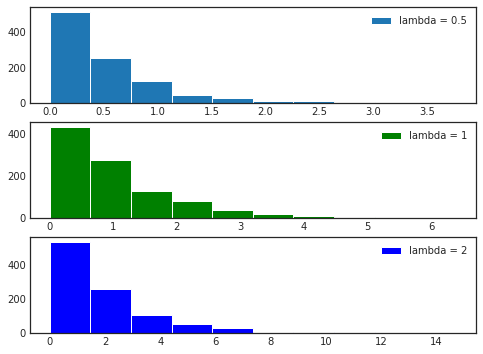

In [20]:
data1 = np.random.exponential(0.5, 1000)
data2 = np.random.exponential(1, 1000)
data3 = np.random.exponential(2, 1000)

plt.figure(figsize = (8,6))

plt.subplot(3,1,1)
plt.hist(data1, label = 'lambda = 0.5')
plt.legend()

plt.subplot(3,1,2)
plt.hist(data2, label = 'lambda = 1', color  = 'g')
plt.legend()

plt.subplot(3,1,3)
plt.hist(data3, label = 'lambda = 2', color = 'b')
plt.legend()

plt.show()

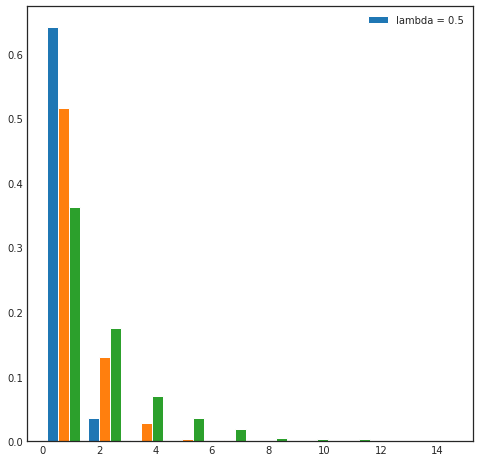

In [21]:
plt.figure(figsize = (8,8))

plt.hist([data1,data2,data3], label = 'lambda = 0.5', bins = 10, density = True)
plt.legend()

plt.show()

### (2) 캘리포니아 집값 데이터 변수별 분포 그리기



* `/content/sample_data/california_housing_test.csv`을 불러오세요.
* 9개의 변수의 분포를 3 x 3 figure에 `seaborn`을 이용해 그려주세요.
* `kde` 선을 (histplot 옵션 )추가해 주세요.

```
df=pd.read_csv('/content/sample_data/california_housing_test.csv')
```

In [22]:
df=pd.read_csv('/content/sample_data/california_housing_test.csv')

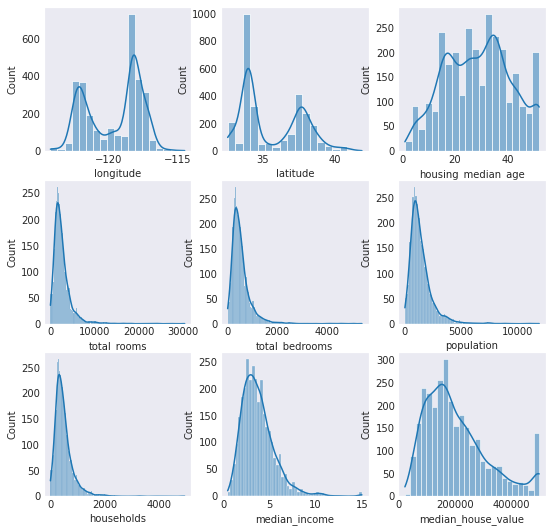

In [67]:
plt.figure(figsize = (9,9))
for i,a in enumerate(df.columns) :
  plt.subplot(3,3,i+1)
  sns.histplot(df[a], kde = True)
plt.show()